In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx
import random
import scipy

In [49]:
while True:
    plaw = networkx.utils.powerlaw_sequence(100)
    avg = sum(plaw) / float(len(plaw))
    if avg < 5:
        break
plaw

[3.860908031420814,
 5.711503049380682,
 1.3169927493178712,
 1.7570032811382563,
 4.1231983086633655,
 1.1333465737330866,
 1.0011825833880204,
 2.065667396528466,
 2.401372199146616,
 1.1196397349858012,
 1.264425718822811,
 1.0107937110628507,
 1.1721292747459962,
 2.236221281115501,
 1.5179048779146738,
 18.986267216765427,
 2.8208951865886283,
 2.62936331071963,
 2.5911726998075832,
 3.2191252067136866,
 4.767850204221666,
 1.2944559066238643,
 1.1219114058940391,
 2.74908871637291,
 1.5470316352039555,
 1.0920663507858952,
 1.339061263267429,
 4.206506738457624,
 2.036945178900934,
 1.0523608298997396,
 2.419990529900913,
 1.0416002584481052,
 4.26953163559901,
 1.337586850218881,
 2.2491581877422524,
 1.242554838781908,
 1.4519117381206832,
 1.7970809861303505,
 1.1219435748963622,
 1.0181277895524175,
 1.6650725476819217,
 3.7868961409185102,
 1.4668000454180536,
 1.5035044061835976,
 1.8306395562068631,
 4.93534373826747,
 3.7518013465132714,
 1.8869819856500234,
 1.1549076603

In [50]:
indist = []
for i in range(len(plaw)):
    indist.append(int(plaw[i]))

In [51]:
avg = float(sum(plaw)) / float(len(plaw))
int(avg)

2

In [52]:
outdist = []
for i in range(len(plaw)):
    outdist.append(int(avg))

In [53]:
print networkx.is_valid_degree_sequence(indist)
print networkx.is_valid_degree_sequence(outdist)

True
True


In [54]:
print sum(indist)
print sum(outdist)

200
200


In [25]:
for i in range(20):
    indist[i] += 1

In [55]:
networkIn = networkx.directed_configuration_model(indist, outdist)
networkOut = networkx.directed_configuration_model(outdist, indist)

In [56]:
networkIn.number_of_edges()

200

In [57]:
networkOut.number_of_edges()

200

In [58]:
import random
INFECTED = 1
NOT_INFECTED = 0

# initialization
def initialization(network, d):
    for node in network.nodes():
        network.node[node]['infected'] = NOT_INFECTED
# start with fraction of nodes being infected
    amtInfected = int(d * network.number_of_nodes())
    for i in range(amtInfected):
        x = random.choice(network.nodes())
        network.node[x]['infected'] = INFECTED
    return amtInfected

# tn each time step: determine state transition based on prev state
def update_network(network, p, p2, num_infections):
    for node in network.nodes():
        if network.node[node]['infected'] is INFECTED:
            for n in network.neighbors(node):
                # and infect them w prob p
                if network.node[n]['infected'] is NOT_INFECTED:
                    x = random.random()
                    if x < p:
                    # infect, check by if p is 1.0, it is always true
                        network.node[n]['infected'] = INFECTED
                        num_infections += 1
            y = random.random()
            if y < p2:
                network.node[node]['infected'] = NOT_INFECTED
                num_infections -= 1
    return num_infections

<function matplotlib.pyplot.show>

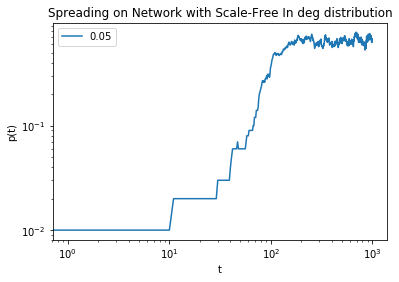

In [59]:
d = 0.01

ps = [.05]
p2 = .02
FINAL = []

amtInf = initialization(networkIn, d)
total = []

for j in range(len(ps)):
    networkcopy = networkIn.copy()
    p = ps[j]
    result = []
    num_infections = 1
    result.append(float(num_infections) / float(networkIn.number_of_nodes()))
    for i in range(1000):
        num_infections = update_network(networkcopy, p, p2, num_infections)
        density = float(num_infections) / float(networkIn.number_of_nodes())
        result.append(density)
    total.append(result)
    
len(total)
FINAL.append(total[0])

import matplotlib.pyplot as plt
%matplotlib inline
for i in range(len(total)):
    plt.plot(total[i])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Spreading on Network with Scale-Free In deg distribution')
plt.legend(ps)
plt.show

<function matplotlib.pyplot.show>

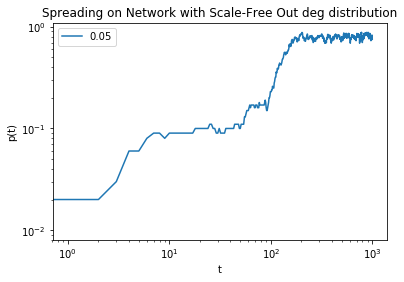

In [60]:
d = 0.01

ps = [.05]
p2 = .02

amtInf = initialization(networkOut, d)
total = []

for j in range(len(ps)):
    networkcopy = networkOut.copy()
    p = ps[j]
    result = []
    num_infections = 1
    result.append(float(num_infections) / float(networkOut.number_of_nodes()))
    for i in range(1000):
        num_infections = update_network(networkcopy, p, p2, num_infections)
        density = float(num_infections) / float(networkOut.number_of_nodes())
        result.append(density)
    total.append(result)
    
len(total)
FINAL.append(total[0])

import matplotlib.pyplot as plt
%matplotlib inline
for i in range(len(total)):
    plt.plot(total[i])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Spreading on Network with Scale-Free Out deg distribution')
plt.legend(ps)
plt.show

In [61]:
len(FINAL)

2

In [67]:
sfnetwork = networkx.generators.scale_free_graph(100)
sfnetwork.number_of_edges()

214

<function matplotlib.pyplot.show>

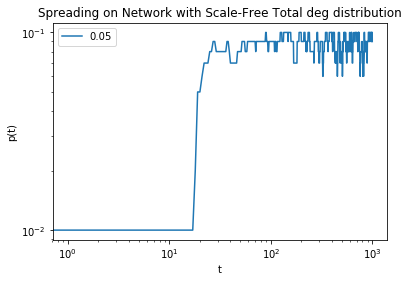

In [70]:
d = 0.01

ps = [.05]
p2 = 0.01

amtInf = initialization(sfnetwork, d)
total = []

for j in range(len(ps)):
    networkcopy = sfnetwork.copy()
    p = ps[j]
    result = []
    num_infections = 1
    result.append(float(num_infections) / float(sfnetwork.number_of_nodes()))
    for i in range(1000):
        num_infections = update_network(networkcopy, p, p2, num_infections)
        density = float(num_infections) / float(sfnetwork.number_of_nodes())
        result.append(density)
    total.append(result)
    
len(total)
if(len(FINAL) == 2):
    FINAL.append(total[0])
else:
    FINAL[2] = total[0]

import matplotlib.pyplot as plt
%matplotlib inline
for i in range(len(total)):
    plt.plot(total[i])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Spreading on Network with Scale-Free Total deg distribution')
plt.legend(ps)
plt.show

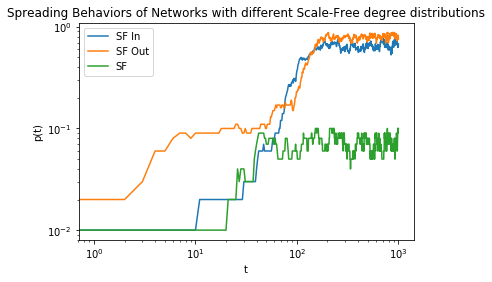

In [69]:
for i in range(len(FINAL)):
    plt.plot(FINAL[i])
plt.yscale('log')
plt.xscale('log')
plt.legend(["SF In", "SF Out", "SF"])
plt.title("Spreading Behaviors of Networks with different Scale-Free degree distributions")
plt.xlabel('t')
plt.ylabel('p(t)')
# p = 0.05